In [124]:
# %cd /content/drive/MyDrive/EECS 545/final/EECS545-Final-Project
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import os
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,8)
plt.style.library['seaborn-whitegrid']
plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'font.size': 16})
X_test = pd.read_csv('./data/x_test_adult.csv')
y_train = pd.read_csv('./data/y_train_adult.csv')
y_test = pd.read_csv('./data/y_test_adult.csv')
X_train = pd.read_csv('./data/x_train_adult.csv')
print(X_train.shape)
print(y_train.values.shape)
print(y_train.columns)

(26048, 14)
(26048, 3)
Index(['Unnamed: 0', 'id', 'income'], dtype='object')


In [125]:
## should be adjusted to best parm
model=xgb.XGBClassifier(n_estimators = 16, 
                  max_depth = 19,
                  min_child_weight = 1.1642516038489912,
                  gamma = 2.710989236548378,
                  reg_lambda = 0.17032894478550822,
                  learning_rate = 0.4840302929456972,
                  colsample_bynode = 0.6272659519889423,
                  )

In [126]:
train_model1 = model.fit(X_train,y_train['income'].values)
train_model1.score(X_test,y_test['income'].values)

0.8608935974205435

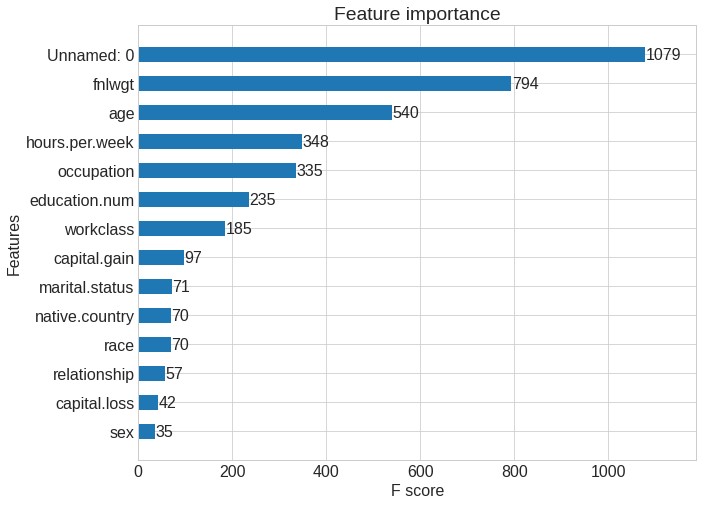

In [127]:
xgb.plot_importance(train_model1, max_num_features=50, height=0.5,importance_type='weight')

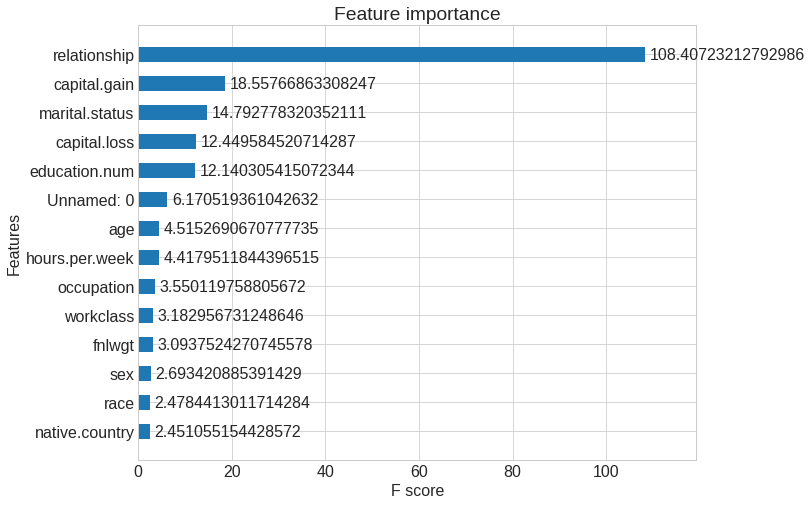

In [128]:
xgb.plot_importance(train_model1, max_num_features=50, height=0.5,importance_type='gain')

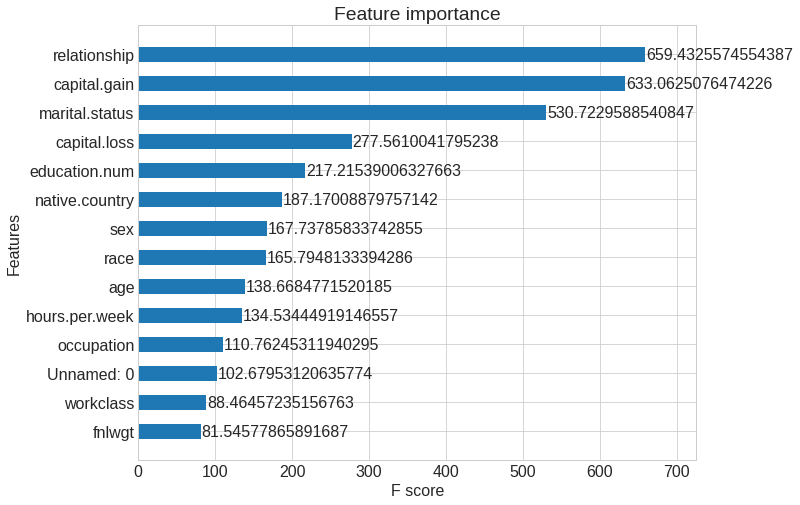

In [129]:
xgb.plot_importance(train_model1, max_num_features=50, height=0.5,importance_type='cover')

In [130]:
# !pip install shap
import shap 
explainer = shap.TreeExplainer(train_model1)
shap_values = shap.TreeExplainer(train_model1).shap_values(X_train)
print(shap_values.shape)

(26048, 14)


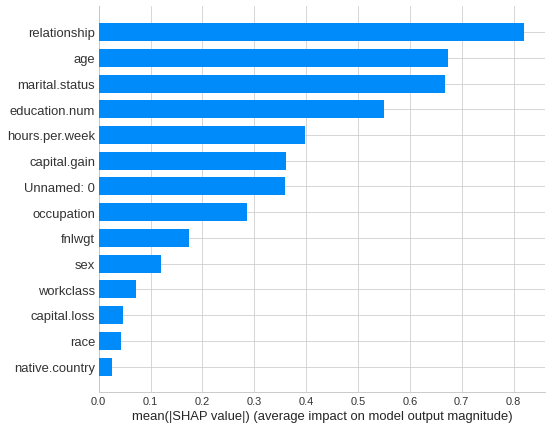

In [131]:
shap.summary_plot(shap_values, X_train, plot_type="bar")


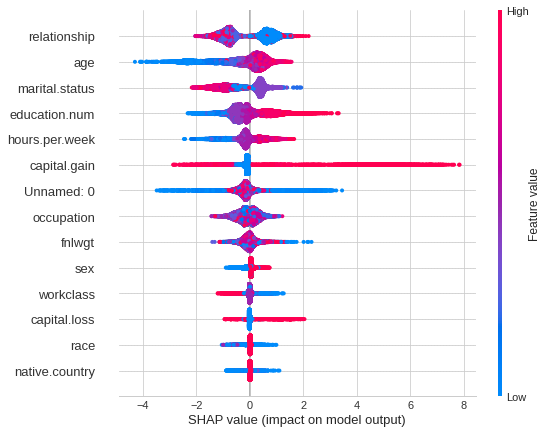

In [132]:
shap.summary_plot(shap_values, X_train)

In [133]:
arr=train_model1.predict(X_test)==y_test['income'].values
arr_mislabeled=np.where(arr==False)[0]
print('show 10 mislabeded samples index:', arr_mislabeled[0:10])

show 10 mislabeded samples index: [ 0  1  5  9 12 14 17 27 43 44]


In [134]:
shap_values[0].shape

(14,)

In [136]:
shap.initjs()
index=arr_mislabeled[0]
shap.force_plot(explainer.expected_value,shap_values[index],X_test.iloc[index,:])
